## Import Library

In [1]:
#pip install sentence-transformers
from sentence_transformers import SentenceTransformer, util
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

## Model Selection and Initialization

In [2]:
# List of models optimized for semantic textual similarity can be found at:
# https://docs.google.com/spreadsheets/d/14QplCdTCDwEmTqrn1LH4yrbKvdogK4oQvYO1K1aPR5M/edit#gid=0
#distiluse-base-multilingual-cased-v1
#model = SentenceTransformer('stsb-roberta-large')
#https://www.sbert.net/docs/pretrained_models.html
model = SentenceTransformer('distiluse-base-multilingual-cased-v1')

Here we make a small set of paragraphs, in later versions we will read these in from files

In [3]:
# creat a similarity matrix for a set of 10 texts
# 1. Create a list of lists
list_of_paragraphs = [["riding my bike in the mountains"],
                      ["on a canal in the Bourgogne area"],
                      ["on a boat on the Rhone river"],
                      ["on taking a walk oh a hill"],
                      ["cycling on a trail"],
                      ["on a river near dijon"],
                      ["faire du vélo dans les montagnes"],
                      ["In the grand canyon"],
                      ["at the washington monument"],
                      ["at the lincoln memorial"]]

In [4]:
embeddings = np.empty([10,512])
sim_matrix = np.empty([10,10])

get the embeddings

In [5]:
for i in range(len(list_of_paragraphs)):
    #print(list_of_paragraphs[i])
    sentence_embedding = model.encode(list_of_paragraphs[i], convert_to_tensor=True)
    embeddings[i] = sentence_embedding
    

calculate the similarity

In [6]:
for i in range(len(list_of_paragraphs)):
    for j in range(len(list_of_paragraphs)):
        sim_matrix[i,j]=cosine_similarity([embeddings[i],embeddings[j]])[0,1]
    

plot the similarity

<function matplotlib.pyplot.show(*args, **kw)>

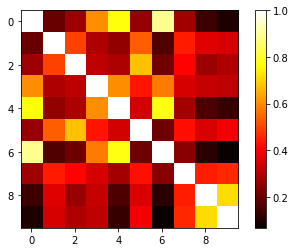

In [7]:
plt.imshow(sim_matrix,cmap="hot")
plt.colorbar()
plt.show

* find trajectory in matrix to visit different similar photo pairs
* present sequence in a coheret interaction scenario
* use french language

## Calculate semantic similarity between two sentences

In [9]:
sentence1 = "I like Python because I can build AI applications"
sentence2 = "I like pizza because I love italian food"

# encode sentences to get their embeddings
embedding1 = model.encode(sentence1, convert_to_tensor=True)
embedding2 = model.encode(sentence2, convert_to_tensor=True)

# compute similarity scores of two embeddings
cosine_scores = util.pytorch_cos_sim(embedding1, embedding2)

print("Sentence 1:", sentence1)
print("Sentence 2:", sentence2)
print("Similarity score:", cosine_scores.item())

Sentence 1: I like Python because I can build AI applications
Sentence 2: I like pizza because I love italian food
Similarity score: 0.4194733500480652


## Calculate semantic similarity between two lists of sentences

In [10]:
sentences1 = ["I like Python because I can build AI applications", "The cat sits on the ground","I always wanted to go to Japan, but I never had a chance.  Finally I went to Kyoto"]   
sentences2 = ["I like Python because I can do data analytics", "The cat walks on the sidewalk","This is a picture of a favorite place on Mount Koya, near Kobe"]

# encode list of sentences to get their embeddings
embedding1 = model.encode(sentences1, convert_to_tensor=True)
embedding2 = model.encode(sentences2, convert_to_tensor=True)

# compute similarity scores of two embeddings
cosine_scores = util.pytorch_cos_sim(embedding1, embedding2)

for i in range(len(sentences1)):
    for j in range(len(sentences2)):
        print("Sentence 1:", sentences1[i])
        print("Sentence 2:", sentences2[j])
        print("Similarity Score:", cosine_scores[i][j].item())
        print()

Sentence 1: I like Python because I can build AI applications
Sentence 2: I like Python because I can do data analytics
Similarity Score: 0.6948120594024658

Sentence 1: I like Python because I can build AI applications
Sentence 2: The cat walks on the sidewalk
Similarity Score: 0.01910119690001011

Sentence 1: I like Python because I can build AI applications
Sentence 2: This is a picture of a favorite place on Mount Koya, near Kobe
Similarity Score: 0.03388866409659386

Sentence 1: The cat sits on the ground
Sentence 2: I like Python because I can do data analytics
Similarity Score: 0.021911118179559708

Sentence 1: The cat sits on the ground
Sentence 2: The cat walks on the sidewalk
Similarity Score: 0.5934419631958008

Sentence 1: The cat sits on the ground
Sentence 2: This is a picture of a favorite place on Mount Koya, near Kobe
Similarity Score: 0.09048700332641602

Sentence 1: I always wanted to go to Japan, but I never had a chance.  Finally I went to Kyoto
Sentence 2: I like 

## Retrieve Top K most similar sentences from a corpus given a sentence

In [11]:
corpus = ["I like Python because I can build AI applications",
          "I like Python because I can do data analytics",
          "The cat sits on the ground",
         "The cat walks on the sidewalk",
         "I always wanted to go to Japan, but I never had a chance.  Finally I went to Kyoto",
         "This is a picture of a favorite place on Mount Koya, near Kobe"]

# encode corpus to get corpus embeddings
corpus_embeddings = model.encode(corpus, convert_to_tensor=True)

In [12]:
sentence = "Saicho went to Mount Hiei near Kyoto"

# encode sentence to get sentence embeddings
sentence_embedding = model.encode(sentence, convert_to_tensor=True)

In [13]:
sentence_embedding.shape

torch.Size([512])

In [14]:
# top_k results to return
top_k=2

# compute similarity scores of the sentence with the corpus
cos_scores = util.pytorch_cos_sim(sentence_embedding, corpus_embeddings)[0]

# Sort the results in decreasing order and get the first top_k
top_results = np.argpartition(-cos_scores, range(top_k))[0:top_k]

print("Sentence:", sentence, "\n")
print("Top", top_k, "most similar sentences in corpus:")
for idx in top_results[0:top_k]:
    print(corpus[idx], "(Score: %.4f)" % (cos_scores[idx]))

Sentence: Saicho went to Mount Hiei near Kyoto 

Top 2 most similar sentences in corpus:
I always wanted to go to Japan, but I never had a chance.  Finally I went to Kyoto (Score: 0.4942)
This is a picture of a favorite place on Mount Koya, near Kobe (Score: 0.4589)


In [15]:
cos_scores.shape

torch.Size([6])